### Loading the original dataset

In [39]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# load the dataset
dataset_path = 'ai4i2020.csv'
df = pd.read_csv(dataset_path)

In [41]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

### Data Preperation

In [43]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [44]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [45]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [46]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [47]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Type,10000,3,L,6000


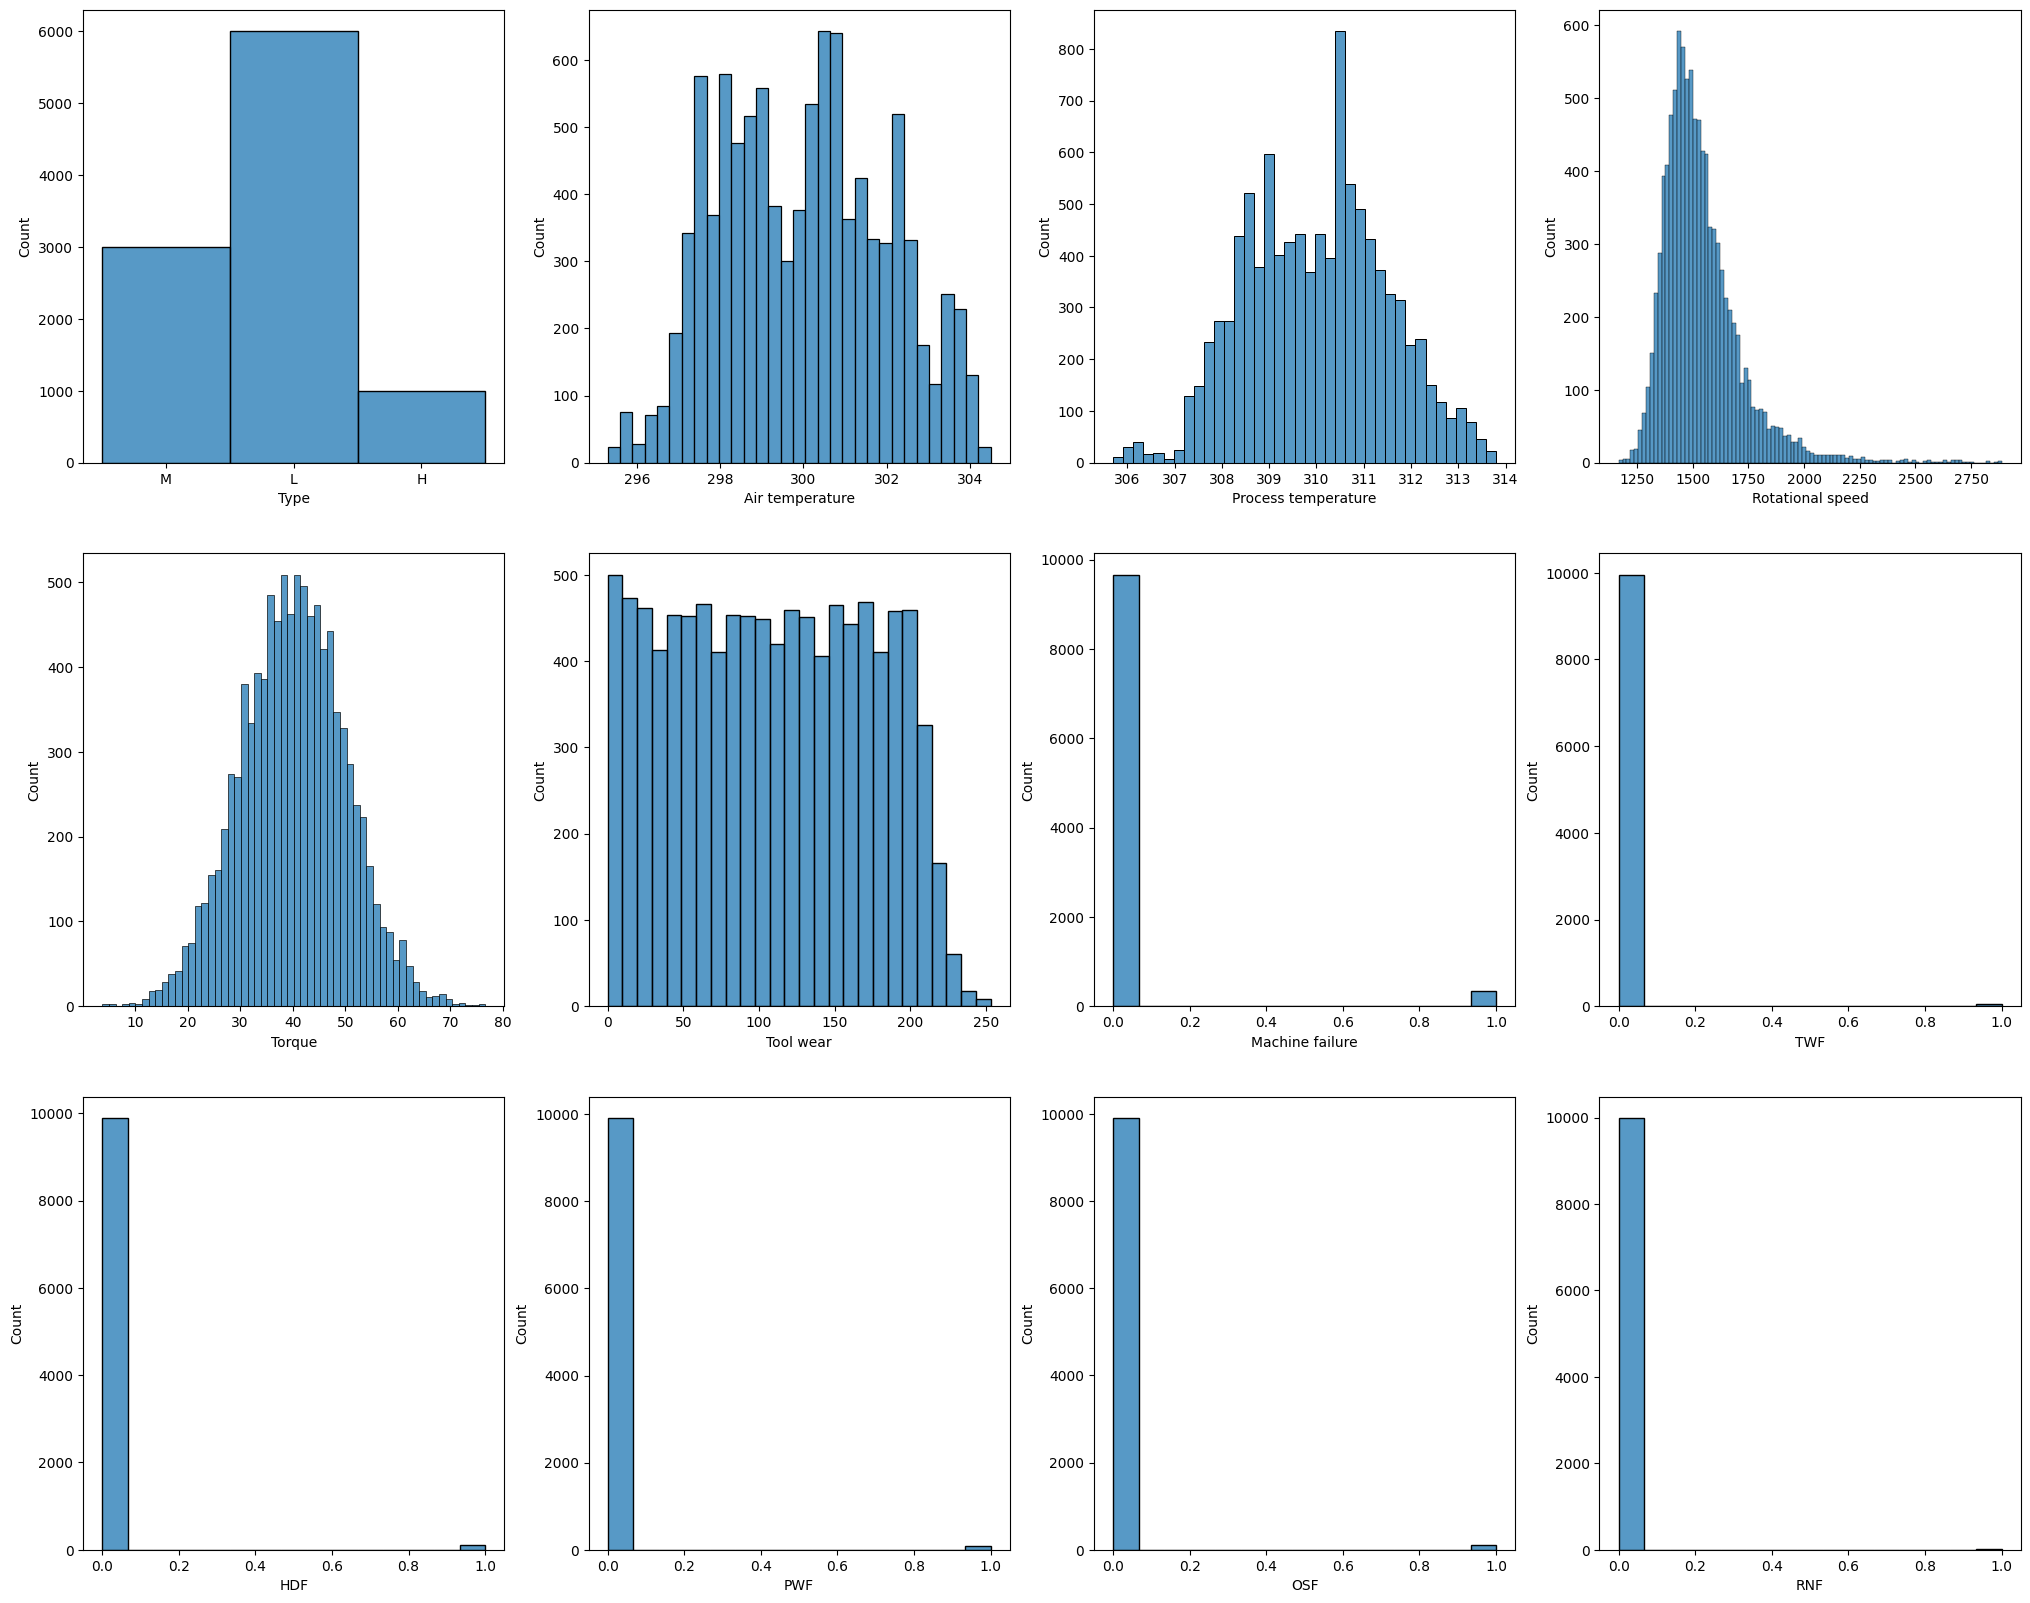

In [48]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

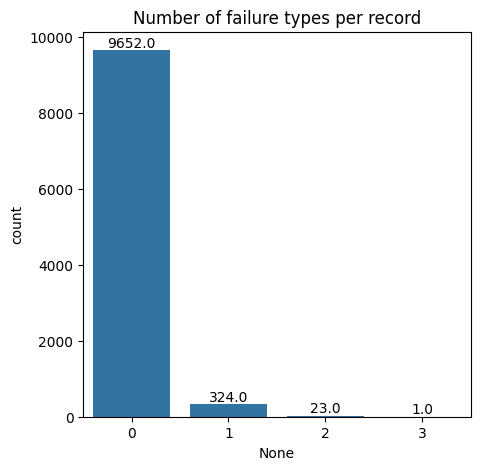

In [49]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

In [50]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


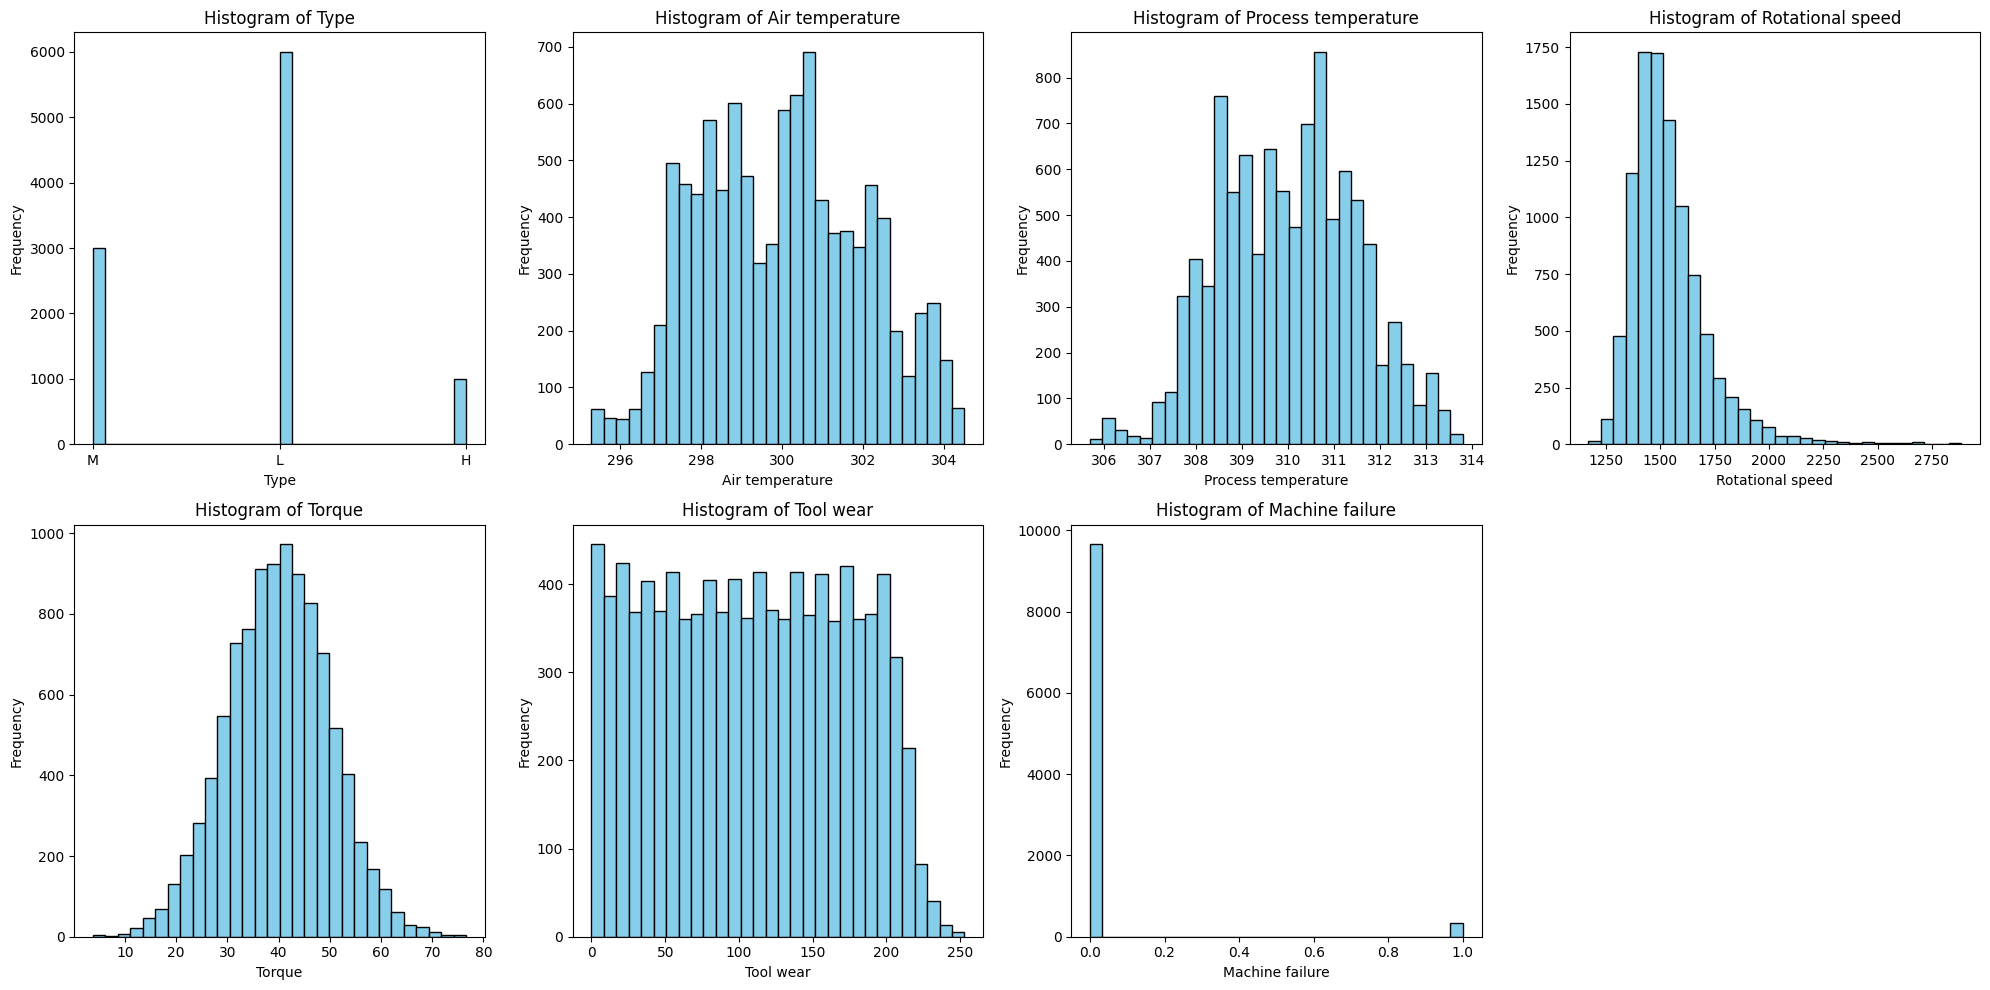

In [52]:
# List of all feature names to iterate over
all_features = df.columns

# Set up the plot grid (adjust rows and cols based on the number of features)
n_features = len(all_features)
n_cols = 4  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot histogram for each feature
for i, feature in enumerate(all_features):
    ax = axes[i]
    ax.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

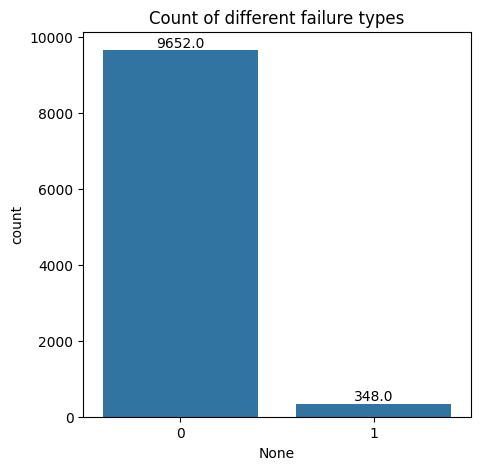

In [53]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


### Creating new features

- 'Power': 'Product of Rotational speed and Torque, representing the power output of the machine.',

- 'temperature_differential': 'Difference between Process temperature and Air temperature, indicating the temperature change during the process.',

- 'power_speed_ratio': 'Ratio of Power to Rotational speed, representing the efficiency of power usage relative to speed.',

- 'thermal_stress': 'Product of temperature_differential and Power, representing the thermal stress on the machine.',

- 'operational_stress': 'Product of Torque and Tool wear, representing the operational stress on the machine.',

- 'efficiency_index': 'Ratio of Power to the product of Torque and Rotational speed, representing the overall efficiency of the machine.',

- 'wear_rate': 'Ratio of Tool wear to operational_stress, representing the rate of tool wear relative to operational stress.',

- 'temperature_stability': 'Rolling standard deviation of temperature_differential over a window of 3, representing the stability of temperature changes.',

- 'power_wear_interaction': 'Product of Power and Tool wear, representing the interaction effect between power output and tool wear.',

- 'speed_torque_efficiency': 'Ratio of Rotational speed to Torque, representing the efficiency of speed relative to torque.',

- 'wear_rate': 'Product of Tool wear and the ratio of Rotational speed to 1000, representing the wear rate adjusted for speed.'

In [55]:
df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)
# Basic engineering
df['temperature_differential'] = df['Process temperature'] - df['Air temperature']
df['power_speed_ratio'] = df['Power'] / (df['Rotational speed'] + 1)
                
# Advanced engineering
df['thermal_stress'] = df['temperature_differential'] * df['Power']
df['operational_stress'] = df['Torque'] * df['Tool wear']
df['efficiency_index'] = df['Power'] / (df['Torque'] * df['Rotational speed'] + 1)
df['temperature_stability'] = df['temperature_differential'].rolling(window=3).std()

# Interaction features
df['power_wear_interaction'] = df['Power'] * df['Tool wear']
df['speed_torque_efficiency'] = df['Rotational speed'] / (df['Torque'] + 1)
df['wear_rate'] = df['Tool wear'] * (df['Rotational speed']/1000)

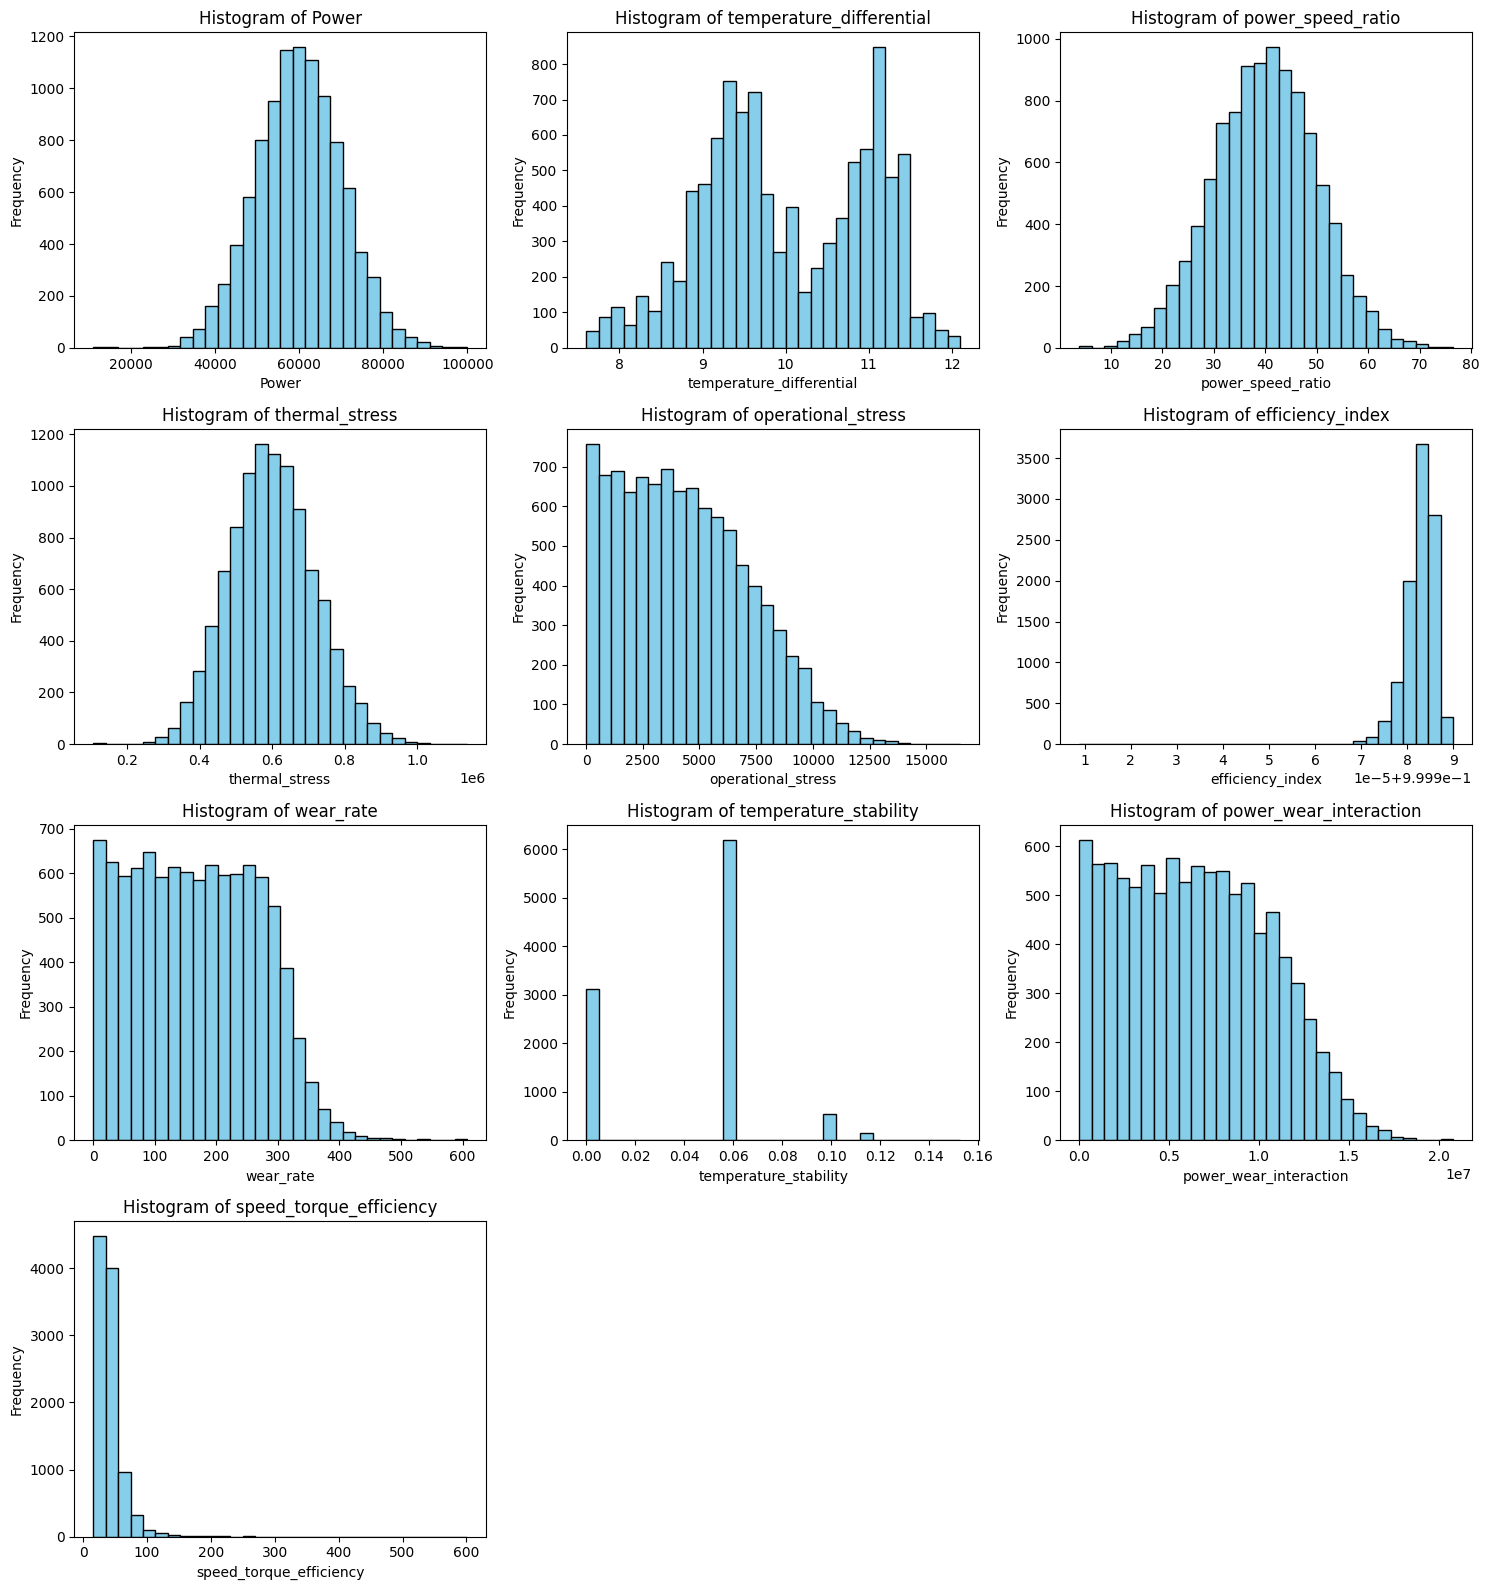

In [56]:
import matplotlib.pyplot as plt

# List of new feature names to iterate over
new_features = [
    'Power', 'temperature_differential', 'power_speed_ratio', 
    'thermal_stress', 'operational_stress', 'efficiency_index', 
    'wear_rate', 'temperature_stability', 'power_wear_interaction', 
    'speed_torque_efficiency'
]

# Set up the plot grid (adjust rows and cols based on the number of features)
n_features = len(new_features)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot histogram for each feature
for i, feature in enumerate(new_features):
    ax = axes[i]
    ax.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### data type conversion

In [57]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'] = df['Type'].replace({'L': 0, 'M': 1, 'H': 2})

/tmp/ipykernel_307635/481295868.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'] = df['Type'].replace({'L': 0, 'M': 1, 'H': 2})


In [58]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [59]:
# view columns data types
df.dtypes

Type                        float64
Air temperature             float64
Process temperature         float64
Rotational speed            float64
Torque                      float64
Tool wear                   float64
Machine failure             float64
Power                       float64
temperature_differential    float64
power_speed_ratio           float64
thermal_stress              float64
operational_stress          float64
efficiency_index            float64
temperature_stability       float64
power_wear_interaction      float64
speed_torque_efficiency     float64
wear_rate                   float64
dtype: object

### Handling Outliers

In [60]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

1. Domain-Specific Rules (Phase 1):


Applies engineering constraints for operating parameters
Enforces physical relationships between variables
Sets realistic limits for measurements and rates of change


2. Statistical Methods (Phase 2):


Uses distribution-aware techniques (Z-score, IQR)
Adapts to normal and non-normal distributions
Implements temporal consistency checks


3. Multivariate Detection (Phase 3):


Employs ensemble of multiple detectors
Uses weighted voting system
Preserves important feature relationships

- Key Features:

Preserves categorical variables ('Type') and target variable ('Machine failure')
Provides detailed cleaning statistics
Handles both normal and non-normal distributions
Maintains data integrity through physics-based rules

In [65]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Create copy of dataframe
df_clean = df.copy()
outlier_flags = pd.DataFrame(index=df_clean.index)

# Get features for outlier detection
features = [col for col in df.columns if col not in excluded_columns]

# Step 1: Adaptive IQR Method with Winsorization
for column in features:
    # Calculate IQR with adaptive multiplier based on distribution skewness
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Adjust multiplier based on skewness
    skewness = abs(df_clean[column].skew())
    iqr_multiplier = 1.5 + (0.5 * (skewness > 1))
    
    # Define bounds
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # Create outlier flag
    outlier_flags[f'{column}_iqr_outlier'] = (
        (df_clean[column] < lower_bound) | 
        (df_clean[column] > upper_bound)
    ).astype(int)
    
    # Winsorize instead of remove
    df_clean[column] = df_clean[column].clip(lower_bound, upper_bound)

# Step 2: Feature-specific treatment with enhanced rules
feature_specific_rules = {
    'Torque': {'multiplier': 2.0, 'winsor_quantile': 0.02},
    'Tool wear': {'multiplier': 2.0, 'winsor_quantile': 0.02},
    'Rotational speed': {'multiplier': 1.8, 'winsor_quantile': 0.01},
    'Power': {'multiplier': 1.8, 'winsor_quantile': 0.01}
}

for feature, rules in feature_specific_rules.items():
    if feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - rules['multiplier'] * IQR
        upper_bound = Q3 + rules['multiplier'] * IQR
        
        # Create feature-specific outlier flag
        outlier_flags[f'{feature}_specific_outlier'] = (
            (df_clean[feature] < lower_bound) | 
            (df_clean[feature] > upper_bound)
        ).astype(int)
        
        # Winsorize instead of remove
        df_clean[feature] = df_clean[feature].clip(lower_bound, upper_bound)

# Step 3: Enhanced Multi-variate Outlier Detection
X = df_clean[features].copy()
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 3.1 Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_labels = iso_forest.fit_predict(X_scaled)
outlier_flags['isolation_forest_outlier'] = (isolation_labels == -1).astype(int)

# 3.2 Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.05, n_neighbors=20)
lof_labels = lof.fit_predict(X_scaled)
outlier_flags['lof_outlier'] = (lof_labels == -1).astype(int)

# 3.3 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
outlier_flags['dbscan_outlier'] = (dbscan_labels == -1).astype(int)

# 3.4 Robust Covariance
try:
    robust_cov = EllipticEnvelope(contamination=0.05, random_state=42)
    robust_cov_labels = robust_cov.fit_predict(X_scaled)
    outlier_flags['robust_cov_outlier'] = (robust_cov_labels == -1).astype(int)
except:
    print("Robust Covariance detection failed, skipping...")
    outlier_flags['robust_cov_outlier'] = 0

# Step 4: Calculate consensus outlier score
outlier_flags['consensus_score'] = outlier_flags.mean(axis=1)
consensus_threshold = 0.4  # Can be adjusted based on strictness needed
final_mask = outlier_flags['consensus_score'] <= consensus_threshold

# Apply final mask
df_clean = df_clean[final_mask].copy()

# Additional check for extreme values using modified z-score
for column in features:
    median = df_clean[column].median()
    mad = np.median(np.abs(df_clean[column] - median))
    modified_zscore = 0.6745 * (df_clean[column] - median) / mad
    extreme_mask = (modified_zscore <= 3.5) & (modified_zscore >= -3.5)
    df_clean = df_clean[extreme_mask]

# Print summary statistics
print("\nOutlier Detection Summary:")
print("-" * 50)
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after outlier handling: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} outliers ({((len(df) - len(df_clean))/len(df))*100:.2f}%)")

# Print method-specific statistics
print("\nOutlier Detection by Method:")
for col in outlier_flags.columns:
    if col != 'consensus_score':
        outlier_count = outlier_flags[col].sum()
        print(f"{col}: {outlier_count} outliers ({(outlier_count/len(df)*100):.2f}%)")

# Save outlier flags for future reference
outlier_flags.to_csv('outlier_flags.csv')

/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-133.858945565142022 > -150.833669490547834). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-132.235992469515764 > -132.715309360935322). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-135.797499367335917 > -136.313574117579634). You may want to try with a hig


Outlier Detection Summary:
--------------------------------------------------
Original dataset size: 8731
Dataset size after outlier handling: 5448
Removed 3283 outliers (37.60%)

Outlier Detection by Method:
Air temperature_iqr_outlier: 0 outliers (0.00%)
Process temperature_iqr_outlier: 0 outliers (0.00%)
Rotational speed_iqr_outlier: 12 outliers (0.14%)
Torque_iqr_outlier: 0 outliers (0.00%)
Tool wear_iqr_outlier: 0 outliers (0.00%)
Power_iqr_outlier: 7 outliers (0.08%)
temperature_differential_iqr_outlier: 0 outliers (0.00%)
power_speed_ratio_iqr_outlier: 0 outliers (0.00%)
thermal_stress_iqr_outlier: 11 outliers (0.13%)
operational_stress_iqr_outlier: 0 outliers (0.00%)
efficiency_index_iqr_outlier: 2 outliers (0.02%)
temperature_stability_iqr_outlier: 0 outliers (0.00%)
power_wear_interaction_iqr_outlier: 0 outliers (0.00%)
speed_torque_efficiency_iqr_outlier: 18 outliers (0.21%)
wear_rate_iqr_outlier: 0 outliers (0.00%)
Torque_specific_outlier: 0 outliers (0.00%)
Tool wear_spec

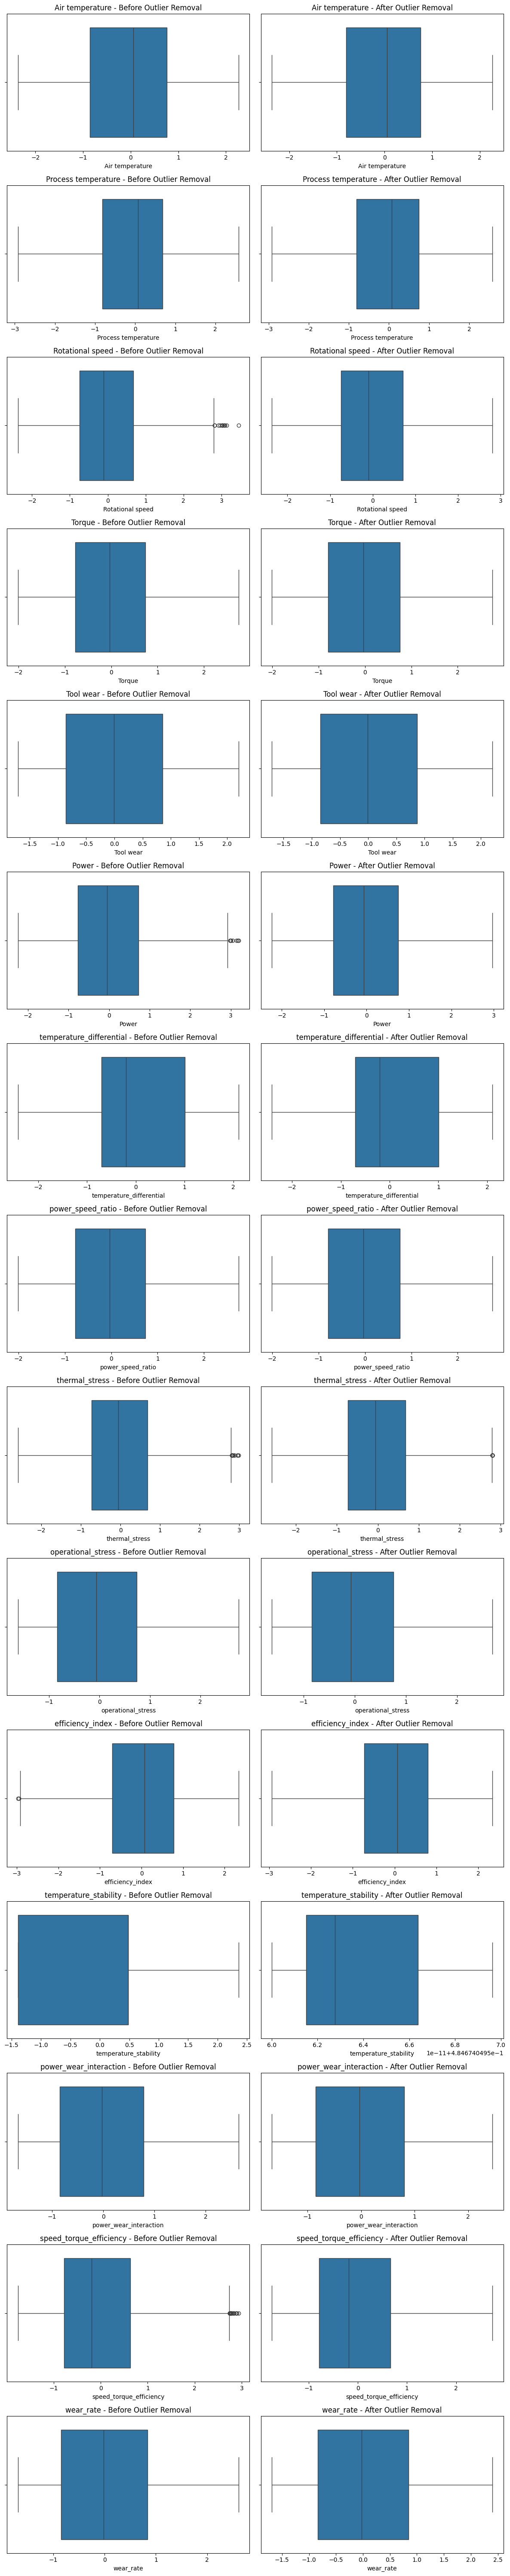

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

if excluded_columns is None:
    excluded_columns = []

features = [col for col in df.columns if col not in excluded_columns]

# Create figure
fig, axes = plt.subplots(len(features), 2, figsize=(12, 4*len(features)))

for i, feature in enumerate(features):
    # Original data boxplot
    sns.boxplot(x=df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Before Outlier Removal')
    
    # Cleaned data boxplot
    sns.boxplot(x=df_clean[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - After Outlier Removal')

plt.tight_layout()
plt.show()

In [67]:
df= df_clean
df.shape # after removing the outliers

(5448, 17)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5448 entries, 2 to 9999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      5448 non-null   float64
 1   Air temperature           5448 non-null   float64
 2   Process temperature       5448 non-null   float64
 3   Rotational speed          5448 non-null   float64
 4   Torque                    5448 non-null   float64
 5   Tool wear                 5448 non-null   float64
 6   Machine failure           5448 non-null   float64
 7   Power                     5448 non-null   float64
 8   temperature_differential  5448 non-null   float64
 9   power_speed_ratio         5448 non-null   float64
 10  thermal_stress            5448 non-null   float64
 11  operational_stress        5448 non-null   float64
 12  efficiency_index          5448 non-null   float64
 13  temperature_stability     5448 non-null   float64
 14  power_wear_in

Normalize the attributes using z-score

$z = \frac{x - \mu} {\sigma}$, $\mu:$ Mean, $σ:$ Standard deviation

In [ ]:
# from scipy.stats import zscore

# # Iterate over the columns in the dataframe
# for col in df.columns:
#       if col not in excluded_columns:
#         # Normalize the values in the column
#         df[col] = zscore(df[col])

class imbalance issue

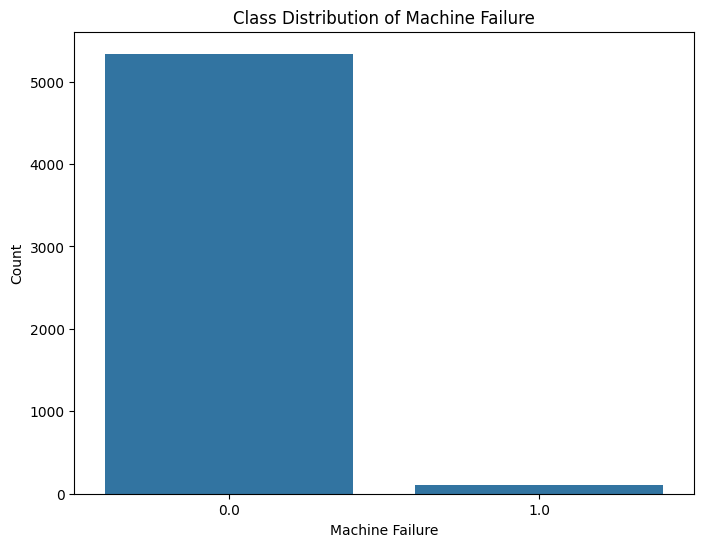

In [81]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the class distribution of 'Machine failure'
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine failure', data=df)
plt.title('Class Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

### Enhanced Preprocessing Function:

- Handles missing values.
- Encodes categorical variables.
- Scales numerical features.
- Checks for remaining features for skewness


Preprocessing Summary:
--------------------------------------------------
Original memory usage: 0.75 MB
Processed memory usage: 0.58 MB

Feature transformations applied:
- temperature_differential: robust
- wear_rate: log
- power_speed_ratio: zscore
- efficiency_index: minmax
- Tool wear: log
- Torque: robust
- Rotational speed: robust
- Power: robust


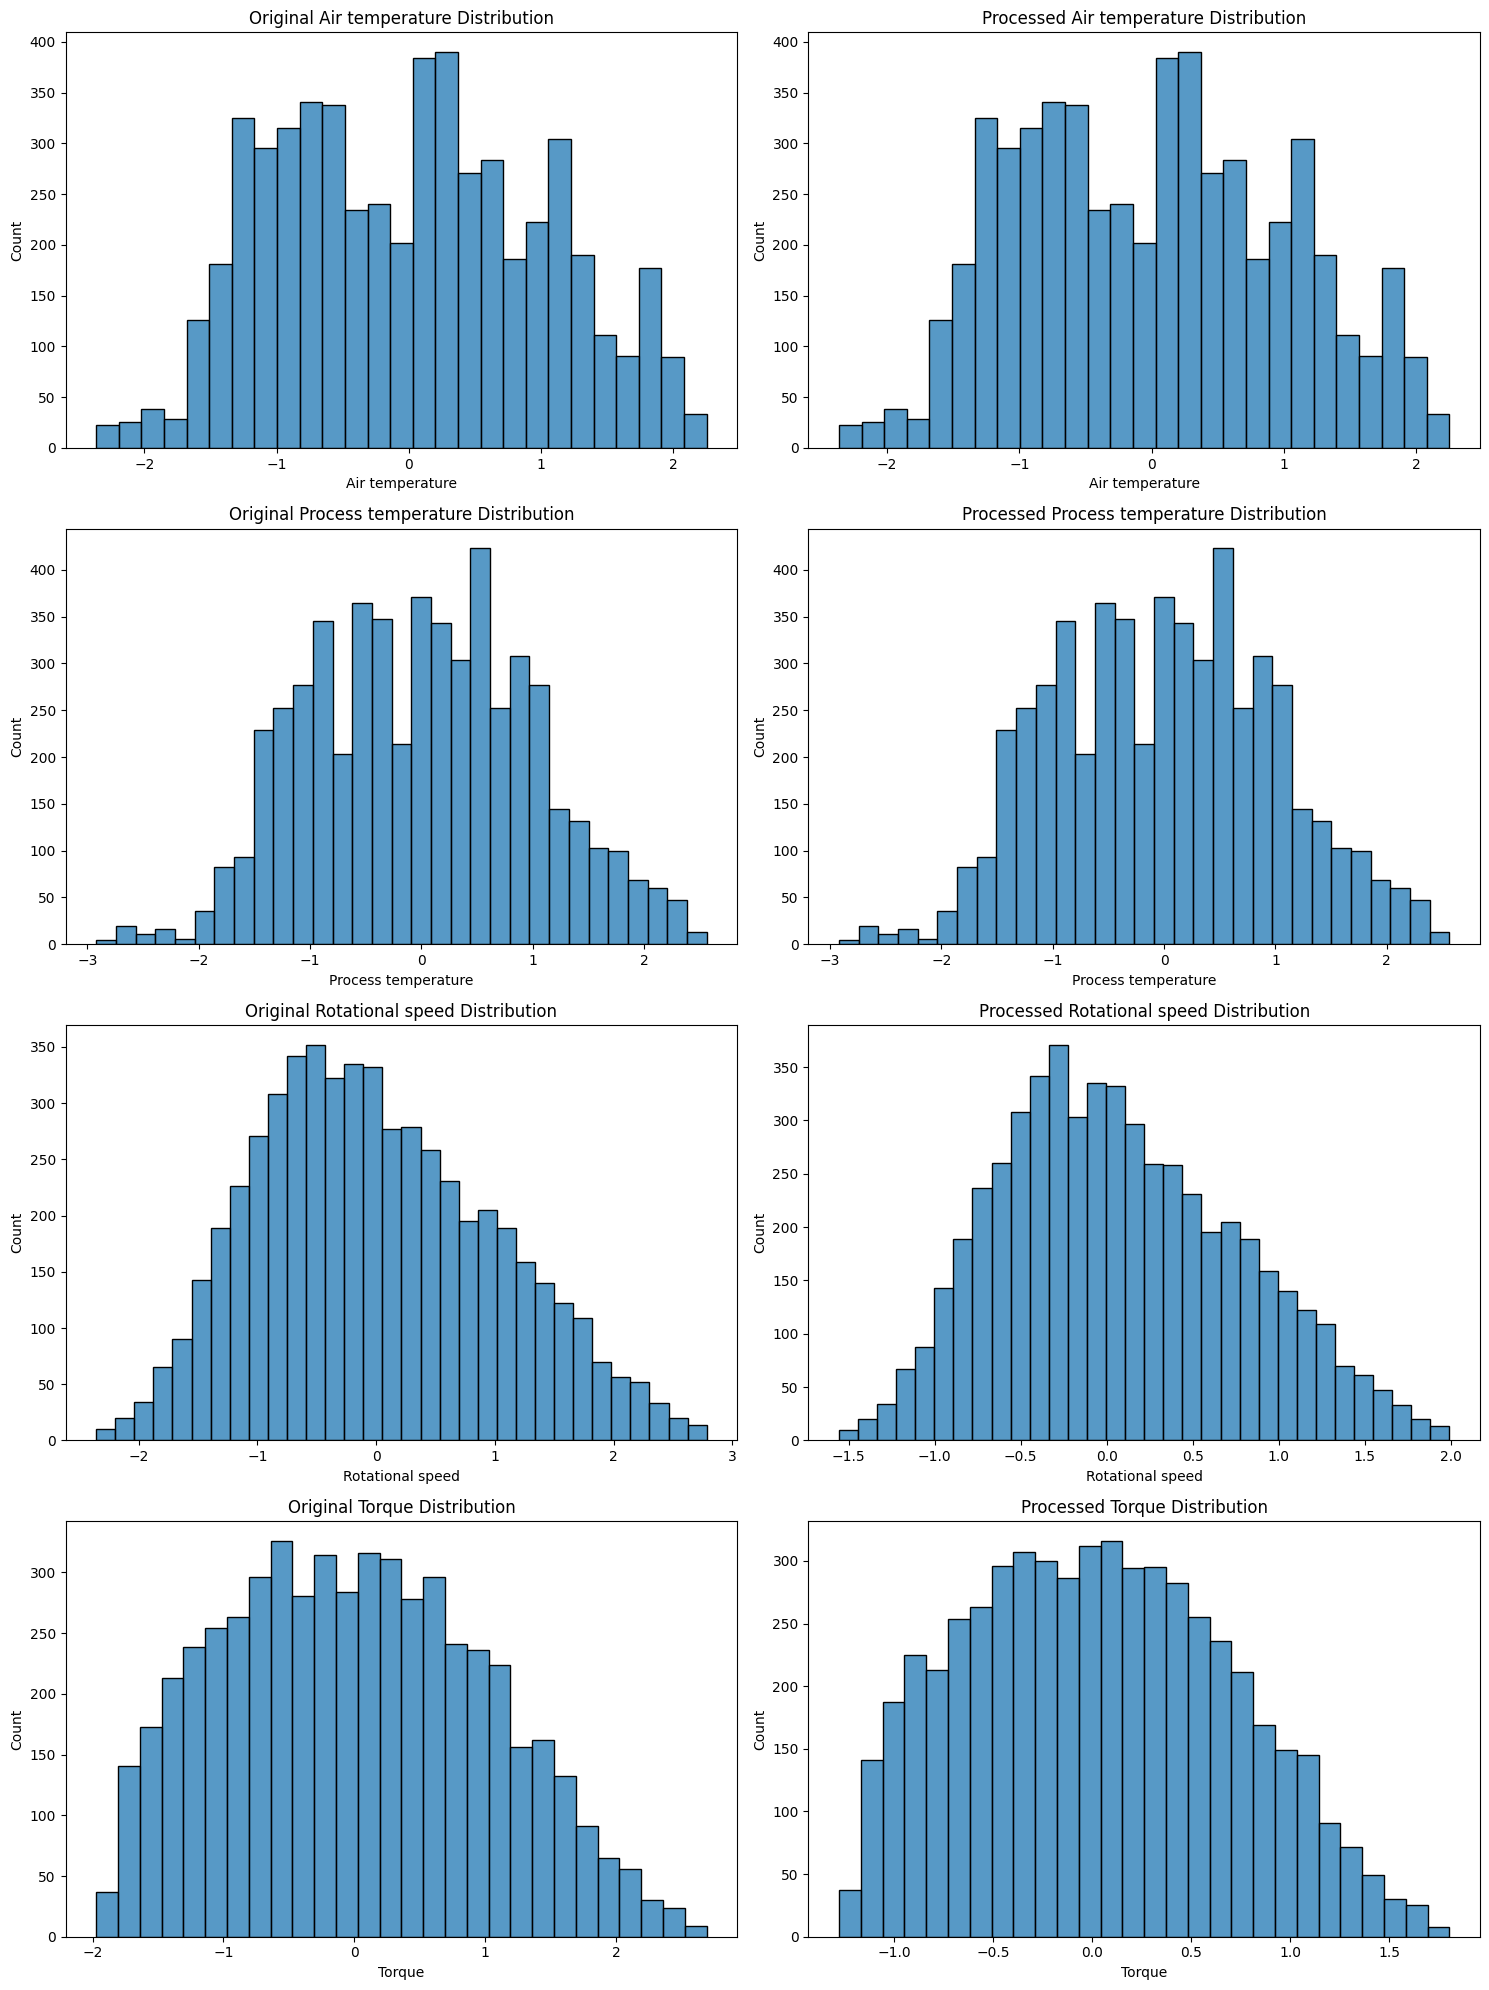

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from scipy.stats import zscore
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')

def enhanced_preprocessing(df, excluded_columns=['Type', 'Machine failure']):
    """
    Enhanced preprocessing pipeline with specific handling for different distributions
    """
    df_processed = df.copy()
    
    # Step 1: Check for missing values
    missing_stats = df_processed.isnull().sum()
    if missing_stats.sum() > 0:
        print("\nMissing Value Summary:")
        print(missing_stats[missing_stats > 0])
        
        # Add missing indicators if needed
        for col in df_processed.columns:
            if df_processed[col].isnull().sum() > 0:
                df_processed[f'{col}_missing'] = df_processed[col].isnull().astype(int)
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # Step 2: Handle data types and memory optimization
    # Convert Type to categorical and one-hot encode
    if 'Type' in df_processed.columns:
        df_processed['Type'] = df_processed['Type'].astype('category')
        type_dummies = pd.get_dummies(df_processed['Type'], prefix='Type')
        df_processed = pd.concat([df_processed, type_dummies], axis=1)
        df_processed.drop('Type', axis=1, inplace=True)
    
    # Memory optimization for numerical columns
    numerical_columns = df_processed.select_dtypes(include=['float64']).columns
    for col in numerical_columns:
        # Check if precision is critical based on unique values
        if df_processed[col].nunique() < 1000:
            df_processed[col] = df_processed[col].astype('float32')
    
    # Step 3: Feature-specific transformations
    # Initialize scalers
    minmax_scaler = MinMaxScaler()
    robust_scaler = RobustScaler()
    
    # Features with specific transformations
    transform_rules = {
        'temperature_differential': 'robust',  # Bimodal - use robust scaling
        'wear_rate': 'log',                   # Right-skewed - use log transform
        'power_speed_ratio': 'zscore',        # Normal - use z-score
        'efficiency_index': 'minmax',         # Concentrated - use minmax
        'Tool wear': 'log',                   # Typically right-skewed
        'Torque': 'robust',                   # May have outliers
        'Rotational speed': 'robust',         # May have outliers
        'Power': 'robust'                     # May have outliers
    }
    
    for col, transform in transform_rules.items():
        if col in df_processed.columns:
            if transform == 'log':
                # Add small constant to handle zeros
                min_val = df_processed[col].min()
                if min_val <= 0:
                    df_processed[col] = df_processed[col] - min_val + 1
                df_processed[col] = np.log1p(df_processed[col])
            
            elif transform == 'robust':
                df_processed[col] = robust_scaler.fit_transform(df_processed[[col]])
            
            elif transform == 'minmax':
                df_processed[col] = minmax_scaler.fit_transform(df_processed[[col]])
            
            elif transform == 'zscore':
                df_processed[col] = zscore(df_processed[col])
    
    # Step 4: Handle remaining numerical columns
    remaining_num_cols = [col for col in df_processed.select_dtypes(include=['float32', 'float64']).columns 
                         if col not in transform_rules.keys() and col not in excluded_columns]
    
    for col in remaining_num_cols:
        # Check skewness
        skewness = df_processed[col].skew()
        if abs(skewness) > 1:  # Highly skewed
            try:
                df_processed[col] = boxcox1p(df_processed[col], 0.25)
            except:
                df_processed[col] = zscore(df_processed[col])
        else:
            df_processed[col] = zscore(df_processed[col])
    
    # Print summary of transformations
    print("\nPreprocessing Summary:")
    print("-" * 50)
    print(f"Original memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print(f"Processed memory usage: {df_processed.memory_usage().sum() / 1024**2:.2f} MB")
    print(f"\nFeature transformations applied:")
    for col, transform in transform_rules.items():
        if col in df_processed.columns:
            print(f"- {col}: {transform}")
    
    return df_processed


# def plot_distributions(df_original, df_processed, features_to_plot=None):
#     """
#     Compare distributions before and after preprocessing
#     """
#     import matplotlib.pyplot as plt
#     import seaborn as sns
    
#     if features_to_plot is None:
#         features_to_plot = df_processed.select_dtypes(include=['float32', 'float64']).columns[:4]
    
#     fig, axes = plt.subplots(len(features_to_plot), 2, figsize=(15, 5*len(features_to_plot)))
    
#     for i, feature in enumerate(features_to_plot):
#         if feature in df_original.columns:
#             # Original distribution
#             sns.histplot(df_original[feature], ax=axes[i,0])
#             axes[i,0].set_title(f'Original {feature} Distribution')
            
#             # Processed distribution
#             sns.histplot(df_processed[feature], ax=axes[i,1])
#             axes[i,1].set_title(f'Processed {feature} Distribution')
    
#     plt.tight_layout()
#     plt.show()


# Example usage:
df_preprocessed = enhanced_preprocessing(df)


### plotting feature distributions

Transformation Analysis:
--------------------------------------------------

Feature: Air temperature
Metric            Original  Processed     Change
-----------------------------------------------
Mean                -0.000      0.000
Std                  1.000      1.000
Skewness             0.136      0.136      0.000
Kurtosis            -0.852     -0.852     -0.000

Feature: Process temperature
Metric            Original  Processed     Change
-----------------------------------------------
Mean                -0.000     -0.000
Std                  1.000      1.000
Skewness             0.056      0.056     -0.000
Kurtosis            -0.523     -0.523     -0.000

Feature: Rotational speed
Metric            Original  Processed     Change
-----------------------------------------------
Mean                 0.000      0.072
Std                  1.000      0.690
Skewness             0.329      0.329      0.000
Kurtosis            -0.483     -0.483     -0.000

Feature: Torque
Metric     

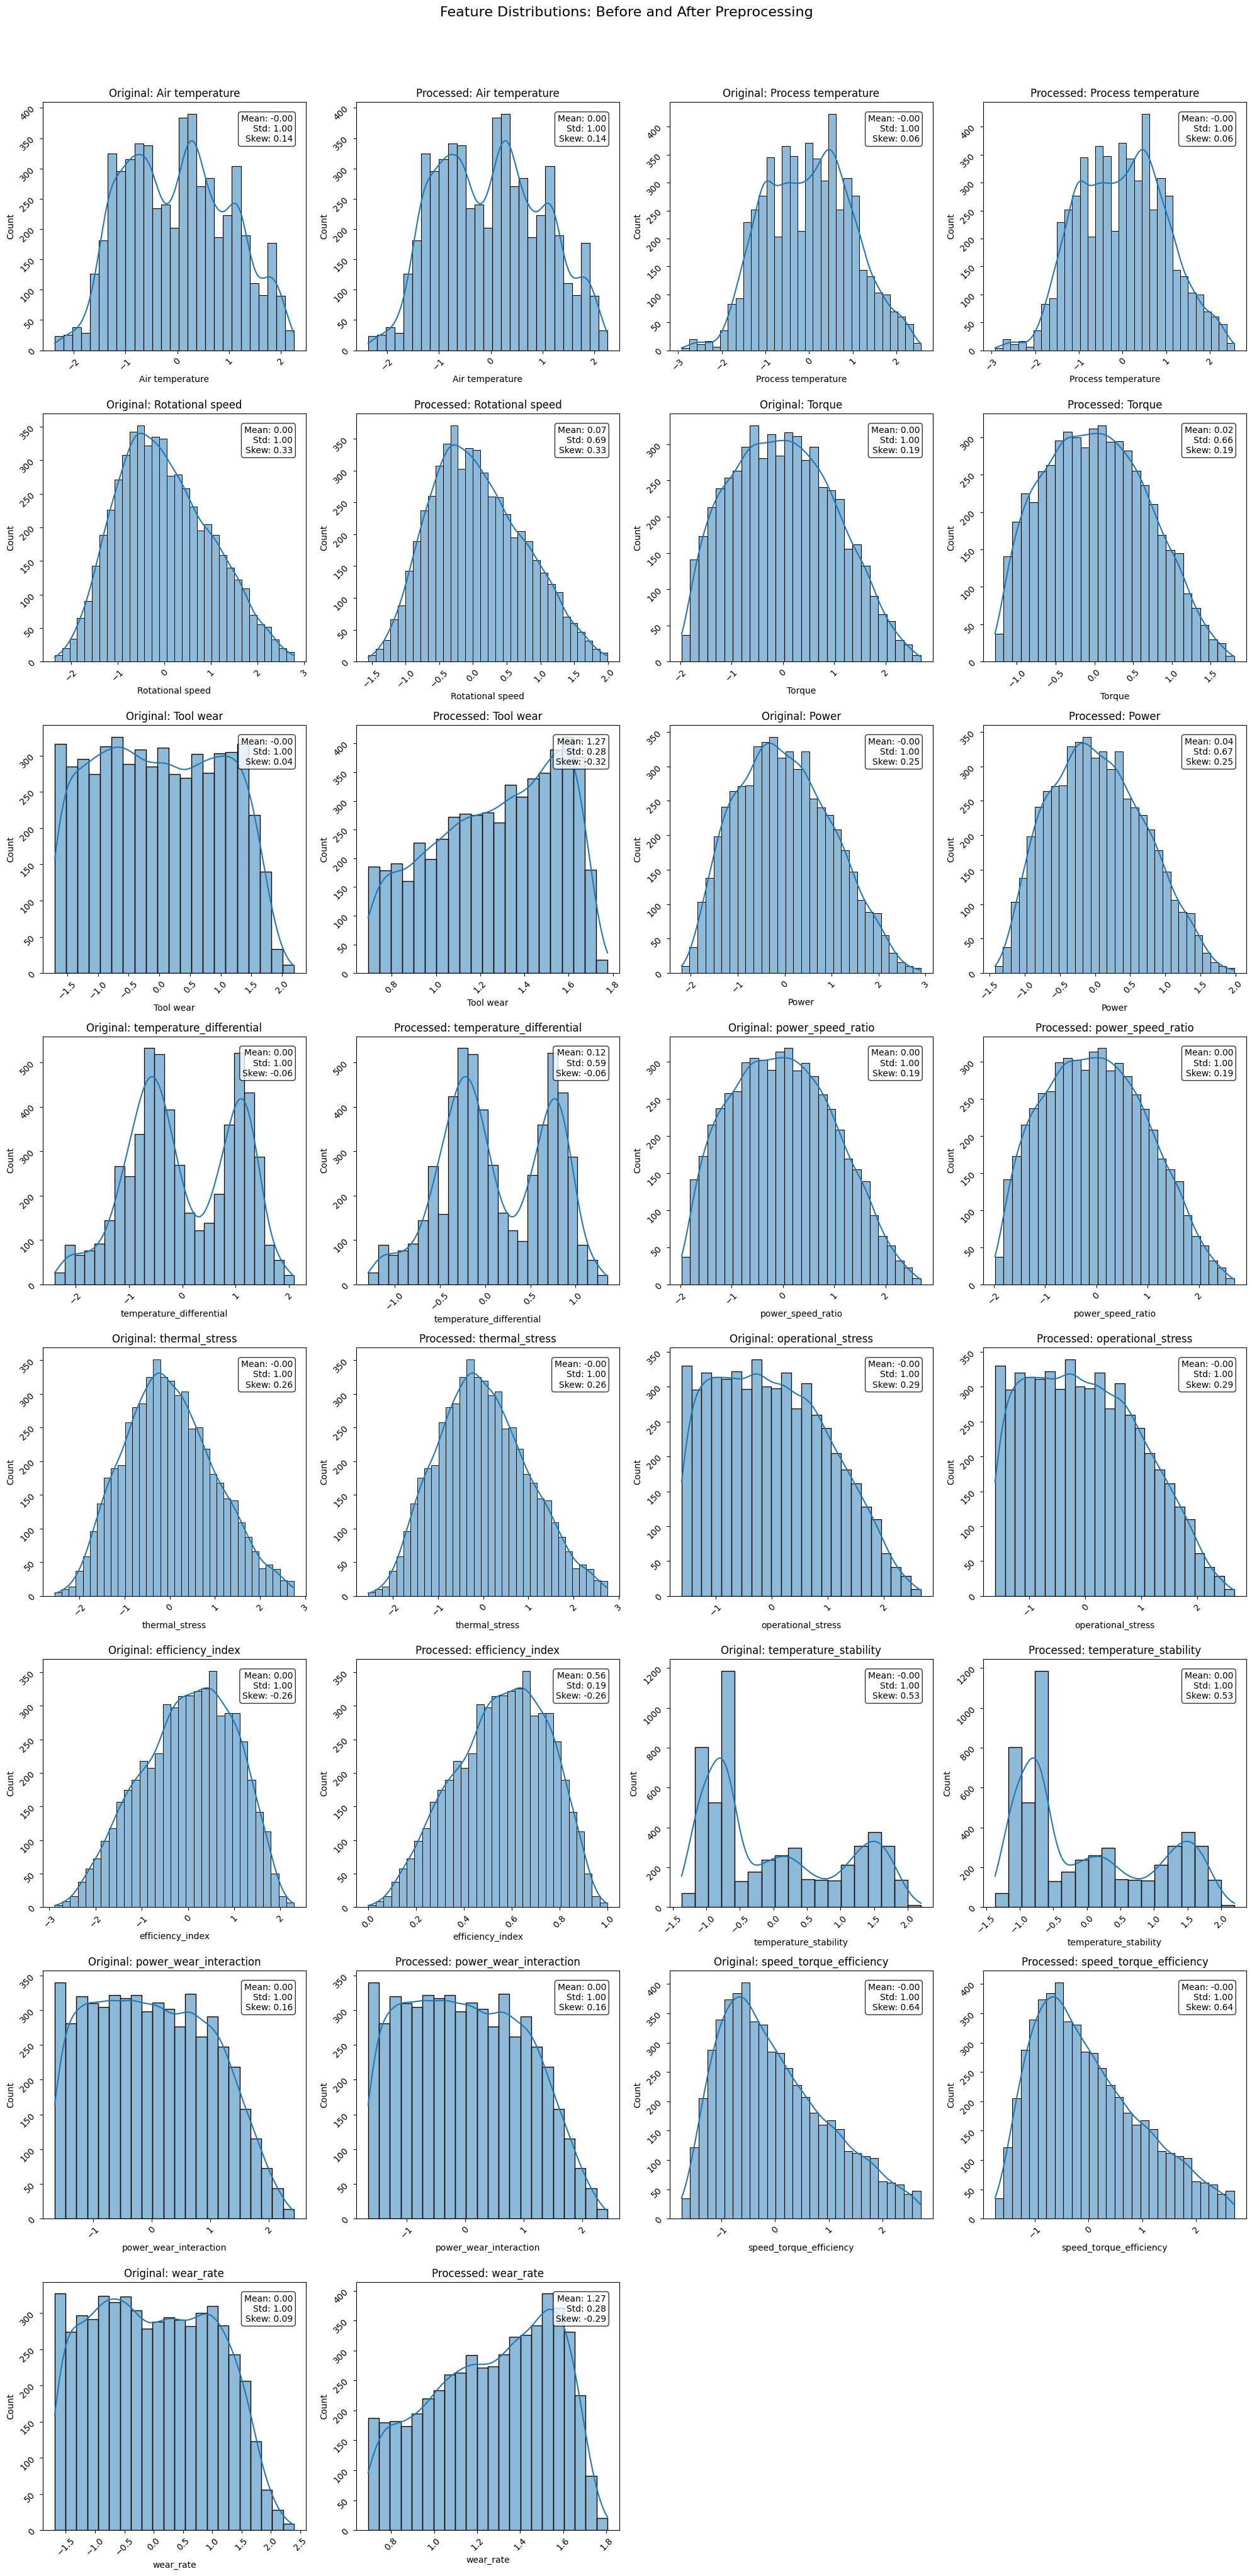

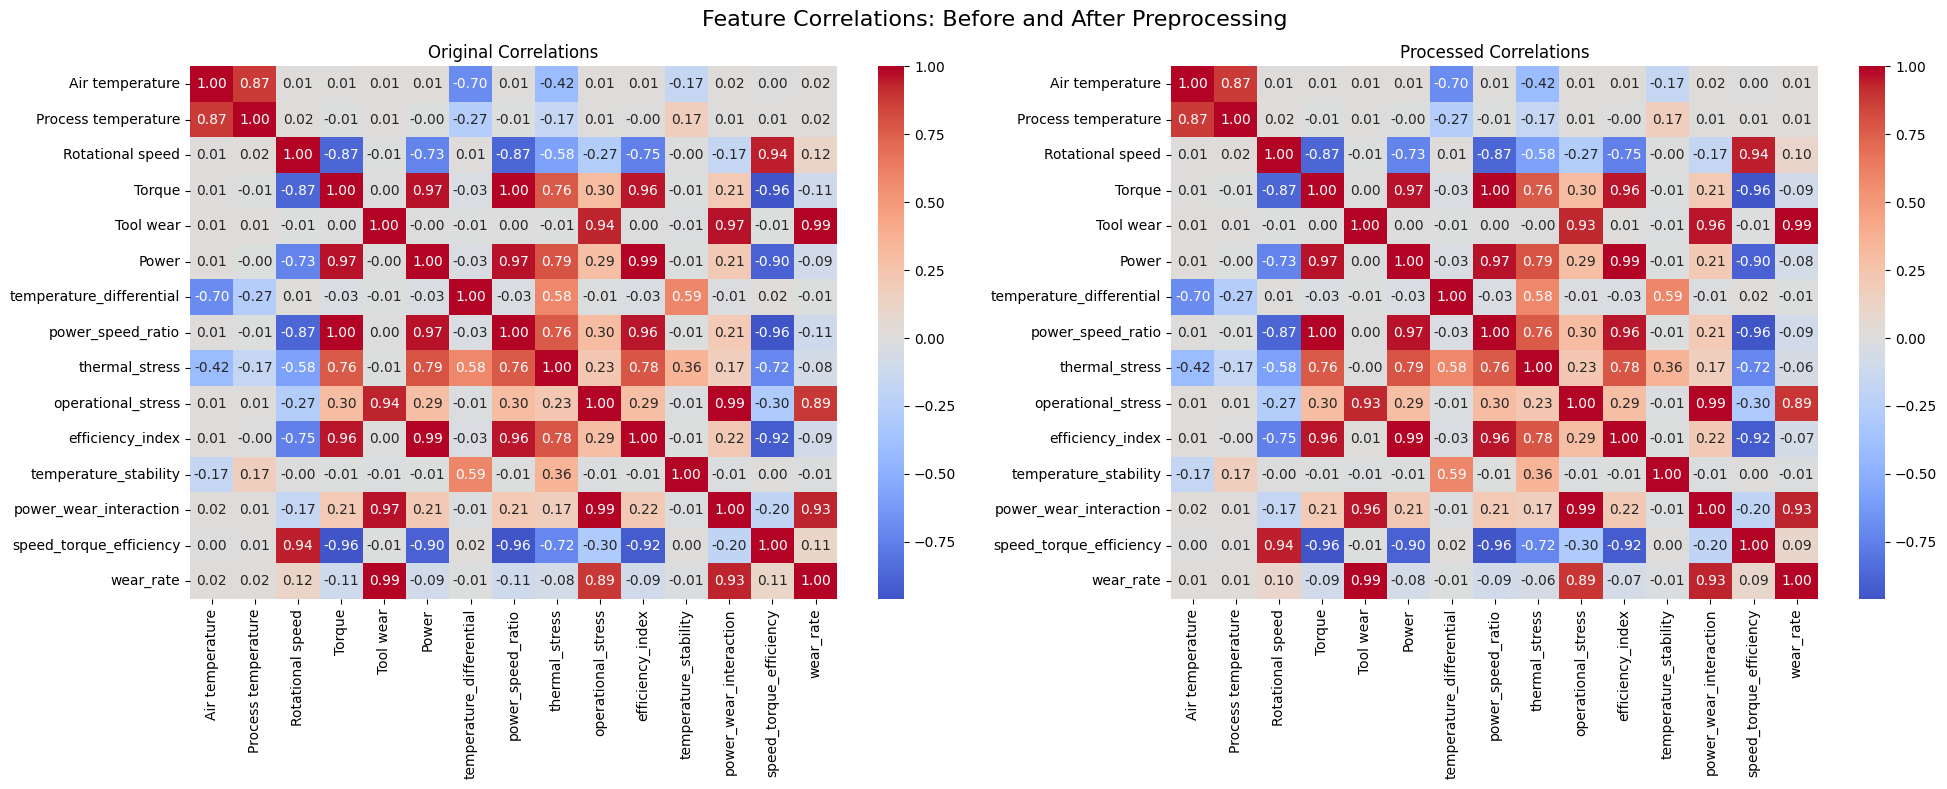

In [80]:
def plot_distributions(df_original, df_processed, excluded_columns=['Type', 'Machine failure']):
    """
    Compare distributions before and after preprocessing for all affected features
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Get all numerical features that were processed
    features_to_plot = [col for col in df_processed.columns 
                       if col in df_original.columns 
                       and col not in excluded_columns
                       and df_original[col].dtype in ['float64', 'float32', 'int64']]
    
    # Calculate number of rows needed (2 features per row)
    n_rows = (len(features_to_plot) + 1) // 2
    
    # Create subplot grid
    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
    fig.suptitle('Feature Distributions: Before and After Preprocessing', fontsize=16, y=1.02)
    
    # Flatten axes for easier indexing if there's only one row
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, feature in enumerate(features_to_plot):
        row = idx // 2
        col = (idx % 2) * 2  # Multiply by 2 because each feature uses 2 columns
        
        # Original distribution
        sns.histplot(df_original[feature], ax=axes[row, col], kde=True)
        axes[row, col].set_title(f'Original: {feature}')
        axes[row, col].set_xlabel(feature)
        axes[row, col].tick_params(labelrotation=45)
        
        # Add basic statistics to the plot
        orig_stats = f'Mean: {df_original[feature].mean():.2f}\n'
        orig_stats += f'Std: {df_original[feature].std():.2f}\n'
        orig_stats += f'Skew: {df_original[feature].skew():.2f}'
        axes[row, col].text(0.95, 0.95, orig_stats,
                          transform=axes[row, col].transAxes,
                          verticalalignment='top',
                          horizontalalignment='right',
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Processed distribution
        sns.histplot(df_processed[feature], ax=axes[row, col+1], kde=True)
        axes[row, col+1].set_title(f'Processed: {feature}')
        axes[row, col+1].set_xlabel(feature)
        axes[row, col+1].tick_params(labelrotation=45)
        
        # Add basic statistics to the plot
        proc_stats = f'Mean: {df_processed[feature].mean():.2f}\n'
        proc_stats += f'Std: {df_processed[feature].std():.2f}\n'
        proc_stats += f'Skew: {df_processed[feature].skew():.2f}'
        axes[row, col+1].text(0.95, 0.95, proc_stats,
                            transform=axes[row, col+1].transAxes,
                            verticalalignment='top',
                            horizontalalignment='right',
                            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Hide any unused subplots
    for row in range(n_rows):
        for col in range(4):
            if row * 2 + col//2 >= len(features_to_plot):
                axes[row, col].set_visible(False)
    
    plt.tight_layout()
    return fig

def plot_correlation_changes(df_original, df_processed, excluded_columns=['Type', 'Machine failure']):
    """
    Compare correlation matrices before and after preprocessing
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Get numerical columns for correlation
    num_cols = [col for col in df_processed.columns 
                if col in df_original.columns 
                and col not in excluded_columns
                and df_original[col].dtype in ['float64', 'float32', 'int64']]
    
    # Calculate correlation matrices
    corr_original = df_original[num_cols].corr()
    corr_processed = df_processed[num_cols].corr()
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Feature Correlations: Before and After Preprocessing', fontsize=16)
    
    # Plot original correlations
    sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0, ax=ax1, fmt='.2f')
    ax1.set_title('Original Correlations')
    
    # Plot processed correlations
    sns.heatmap(corr_processed, annot=True, cmap='coolwarm', center=0, ax=ax2, fmt='.2f')
    ax2.set_title('Processed Correlations')
    
    plt.tight_layout()
    return fig

def analyze_transformations(df_original, df_processed, excluded_columns=['Type', 'Machine failure']):
    """
    Print detailed analysis of the transformations
    """
    features = [col for col in df_processed.columns 
                if col in df_original.columns 
                and col not in excluded_columns
                and df_original[col].dtype in ['float64', 'float32', 'int64']]
    
    print("Transformation Analysis:")
    print("-" * 50)
    
    for feature in features:
        orig_skew = df_original[feature].skew()
        proc_skew = df_processed[feature].skew()
        orig_kurt = df_original[feature].kurtosis()
        proc_kurt = df_processed[feature].kurtosis()
        
        print(f"\nFeature: {feature}")
        print(f"{'Metric':<15} {'Original':>10} {'Processed':>10} {'Change':>10}")
        print("-" * 47)
        print(f"{'Mean':<15} {df_original[feature].mean():>10.3f} {df_processed[feature].mean():>10.3f}")
        print(f"{'Std':<15} {df_original[feature].std():>10.3f} {df_processed[feature].std():>10.3f}")
        print(f"{'Skewness':<15} {orig_skew:>10.3f} {proc_skew:>10.3f} {proc_skew-orig_skew:>10.3f}")
        print(f"{'Kurtosis':<15} {orig_kurt:>10.3f} {proc_kurt:>10.3f} {proc_kurt-orig_kurt:>10.3f}")

# Example usage:
fig1 = plot_distributions(df, df_preprocessed)
fig2 = plot_correlation_changes(df, df_preprocessed)
analyze_transformations(df, df_preprocessed)

### solving class imbalancing

Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({0.0: 5339, 1.0: 5339})
Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({0.0: 5339, 1.0: 5305})
Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({1.0: 5302, 0.0: 4898})
Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({0.0: 109, 1.0: 109})
Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({0.0: 3336, 1.0: 2669})
Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({0.0: 5339, 1.0: 5339})


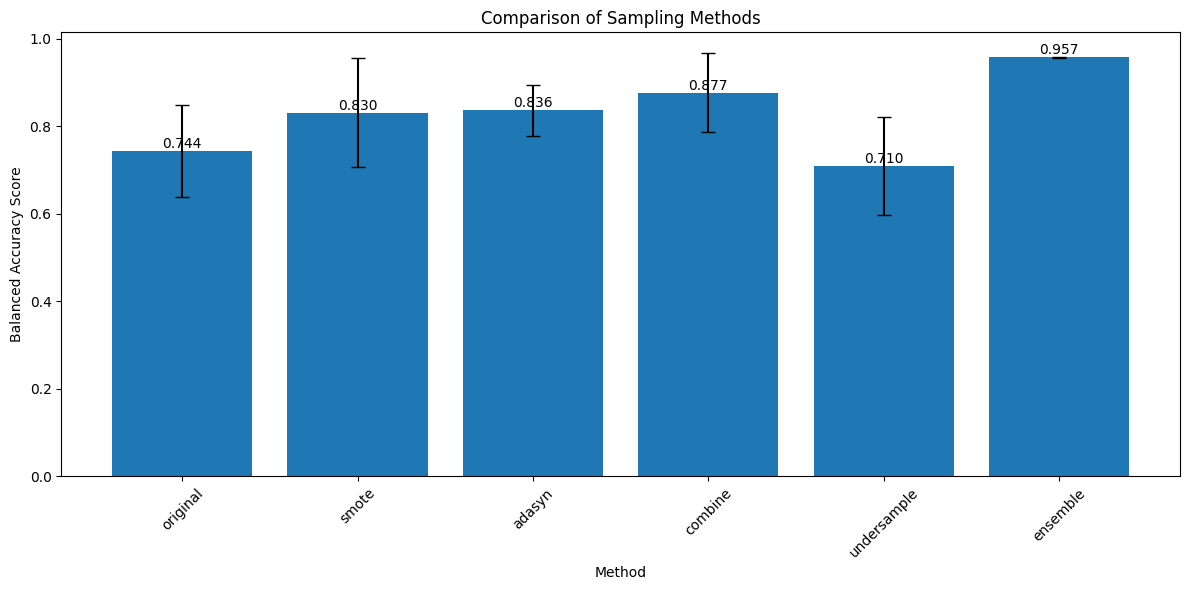

In [83]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter
import pandas as pd
import numpy as np

def handle_imbalance(X, y, method='smote', random_state=42):
    """
    Handle class imbalance using various methods
    
    Parameters:
    -----------
    X : DataFrame or array-like
        Features
    y : Series or array-like
        Target variable
    method : str
        Method to use: 'smote', 'adasyn', 'combine', 'undersample', or 'ensemble'
    
    Returns:
    --------
    X_resampled, y_resampled
    """
    print("Original class distribution:", Counter(y))
    
    if method == 'smote':
        # SMOTE with safer parameters
        sampler = SMOTE(sampling_strategy='auto',
                       k_neighbors=5,
                       random_state=random_state)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    elif method == 'adasyn':
        # ADASYN - Adaptive Synthetic Sampling
        sampler = ADASYN(sampling_strategy='auto',
                        n_neighbors=5,
                        random_state=random_state)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    elif method == 'combine':
        # SMOTEENN - SMOTE with Edited Nearest Neighbors cleaning
        sampler = SMOTEENN(sampling_strategy='auto',
                          random_state=random_state)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    elif method == 'undersample':
        # Undersampling the majority class
        sampler = RandomUnderSampler(sampling_strategy='auto',
                                   random_state=random_state)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    elif method == 'ensemble':
        # Multiple sampling strategies combined
        # First SMOTE, then selective undersampling
        smote = SMOTE(sampling_strategy=0.5,  # Create minority samples to be 50% of majority
                     random_state=random_state)
        X_temp, y_temp = smote.fit_resample(X, y)
        
        under = RandomUnderSampler(sampling_strategy=0.8,  # Keep 80% of majority samples
                                 random_state=random_state)
        X_resampled, y_resampled = under.fit_resample(X_temp, y_temp)
    
    print("Resampled class distribution:", Counter(y_resampled))
    return X_resampled, y_resampled

def create_balanced_folds(X, y, n_splits=5, random_state=42):
    """
    Create stratified folds while handling imbalance
    """
    from sklearn.model_selection import StratifiedKFold
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return skf.split(X, y)

def evaluate_sampling_methods(X, y, random_state=42):
    """
    Compare different sampling methods and their impact
    """
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report, balanced_accuracy_score
    from sklearn.model_selection import cross_val_score
    
    methods = ['smote', 'adasyn', 'combine', 'undersample', 'ensemble']
    results = {}
    
    # Simple classifier for comparison
    clf = DecisionTreeClassifier(random_state=random_state)
    
    # Original data performance
    original_scores = cross_val_score(clf, X, y, cv=5, scoring='balanced_accuracy')
    results['original'] = {
        'mean_score': original_scores.mean(),
        'std_score': original_scores.std(),
        'class_distribution': Counter(y)
    }
    
    # Test each sampling method
    for method in methods:
        X_resampled, y_resampled = handle_imbalance(X, y, method=method)
        scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='balanced_accuracy')
        
        results[method] = {
            'mean_score': scores.mean(),
            'std_score': scores.std(),
            'class_distribution': Counter(y_resampled)
        }
    
    return results

def plot_sampling_results(results):
    """
    Visualize the impact of different sampling methods
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Prepare data for plotting
    methods = list(results.keys())
    scores = [results[method]['mean_score'] for method in methods]
    errors = [results[method]['std_score'] for method in methods]
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(methods, scores, yerr=errors, capsize=5)
    plt.title('Comparison of Sampling Methods')
    plt.xlabel('Method')
    plt.ylabel('Balanced Accuracy Score')
    plt.xticks(rotation=45)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    return plt.gcf()

# Example usage:

# First, split your data into features and target
X = df_preprocessed.drop(['Machine failure'], axis=1)
y = df_preprocessed['Machine failure']

# Evaluate different sampling methods
results = evaluate_sampling_methods(X, y)

# Plot the results
fig = plot_sampling_results(results)

# Choose the best method and apply it
X_resampled, y_resampled = handle_imbalance(X, y, method='smote')


### saving it into a csv

In [84]:
# After resampling
X_resampled, y_resampled = handle_imbalance(X, y, method='ensemble')

# Reconstruct the full dataframe with all features and target
# Convert to DataFrame if X_resampled is not already a DataFrame
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Add the target variable back
df_resampled = X_resampled.copy()
df_resampled['Machine failure'] = y_resampled

# Save to CSV
df_resampled.to_csv('balanced_preprocessed_data.csv', index=False)

# Print shape information
print(f"Original data shape: {df.shape}")
print(f"Resampled data shape: {df_resampled.shape}")
print("\nClass distribution in resampled data:")
print(df_resampled['Machine failure'].value_counts(normalize=True))

Original class distribution: Counter({0.0: 5339, 1.0: 109})
Resampled class distribution: Counter({0.0: 3336, 1.0: 2669})
Original data shape: (5448, 17)
Resampled data shape: (6005, 19)

Class distribution in resampled data:
Machine failure
0.0    0.555537
1.0    0.444463
Name: proportion, dtype: float64


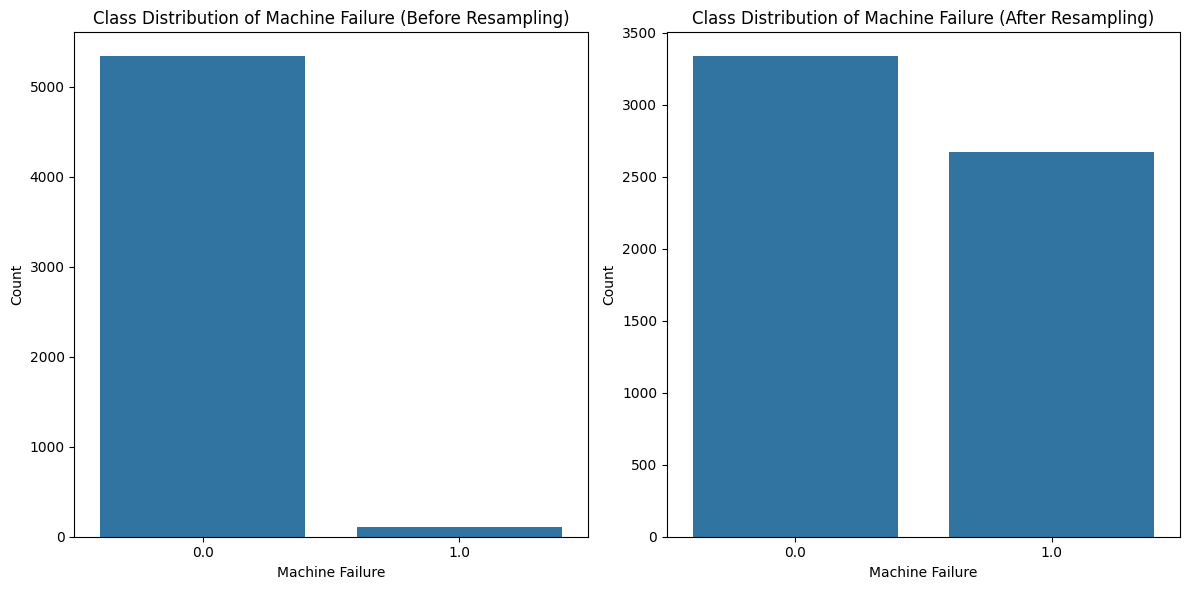

In [87]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the class distribution of 'Machine failure' before resampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Machine failure', data=df)
plt.title('Class Distribution of Machine Failure (Before Resampling)')
plt.xlabel('Machine Failure')
plt.ylabel('Count')

# Plot the class distribution of 'Machine failure' after resampling
plt.subplot(1, 2, 2)
sns.countplot(x='Machine failure', data=df_resampled)
plt.title('Class Distribution of Machine Failure (After Resampling)')
plt.xlabel('Machine Failure')
plt.ylabel('Count')

plt.tight_layout()
plt.show()